# Analyze and plot results

In [2]:
import torch
import matplotlib.pyplot as plt

In [4]:
budget, fr_TSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_StandardTwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA)

fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

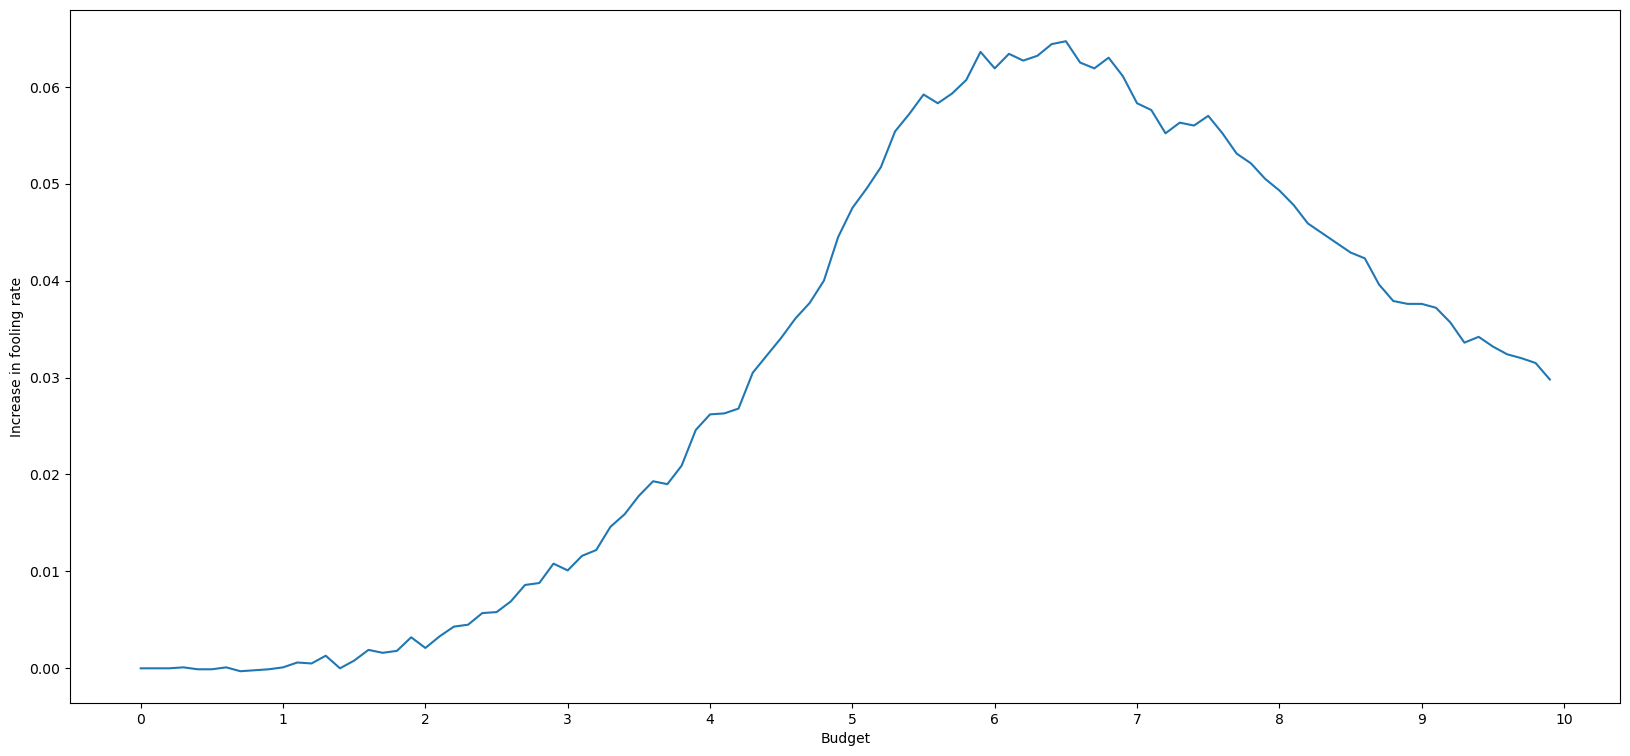

In [30]:
plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(range(0,11))
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.show()